In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#CSV Dosya Yolu

dosya_yolu='/content/drive/MyDrive/LastFmData.csv'

#CSV Dosya Oku

df=pd.read_csv(dosya_yolu)
fm=df.copy()

Veri setimizi tanıtmadan önce aşşağıda kodumuzun işlevini anlatmak istiyoruz.Biz bu verisetimizi incelerken ve zorunlu olarak yaptığımız Web Scrabing yönteminden sonra çok fazla eksik değerler oldu ve
ileride de değineceğimiz üzere emekli olan ve çok değersiz futbolcuları verisetimizden temizledik.Fakat geriye kalan bir çok oyuncuyu tek tek elimizle girdik ve bu işlem çok uzun olduğu için
nasıl yaptığımızı aşşağıdaki kodda örnek olarak gösterip verisetimize aktardık.Böylece temiz bir veri setiyle işleme başlıyor gibi olduk.

In [4]:
'''filtered_data = df[(df['Values'] > 180) ]

Yeni 'values' değerlerini klavyeden al ve güncelle
for index, row in filtered_data.iterrows():
    value = float(input(f"Yeni {row['Name']} ({row['Club']})'in değerini girin: "))
    df.loc[index, 'Values'] = value
    df.to_csv('/content/drive/MyDrive/CSV/LastFmData.csv', index=False)'''

'filtered_data = df[(df[\'Values\'] > 180) ]\n\nYeni \'values\' değerlerini klavyeden al ve güncelle\nfor index, row in filtered_data.iterrows():\n    value = float(input(f"Yeni {row[\'Name\']} ({row[\'Club\']})\'in değerini girin: "))\n    df.loc[index, \'Values\'] = value\n    df.to_csv(\'/content/drive/MyDrive/CSV/LastFmData.csv\', index=False)'

**1)ÖNCELİKLE VERİ SETİMİZİ TANIYALIM.**


Verisetimizdeki Values adlı featurea 0-1 arasında normalize ettik ve yeni sütuna yazdırdık.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler nesnesini oluşturun
scaler = MinMaxScaler(feature_range=(0, 1))  # Ölçekleme aralığını [0, 1] olarak belirtin

# 'Values' sütununu ölçekleyin ve 'Normalized_Values' sütununa atayın
fm['Normalized_Values'] = scaler.fit_transform(fm[['Values']])

# 'Normalized_Values' sütununu yazdırın
print(fm['Normalized_Values'])


0       0.333296
1       1.000000
2       0.111062
3       1.000000
4       0.361076
          ...   
7637    0.016612
7638    0.001056
7639    0.000778
7640    0.000500
7641    0.001056
Name: Normalized_Values, Length: 7642, dtype: float64


Veri setimizde çok fazla latin kökenli futbolcumuz olduğu için yazımlarda sorun oluyor bunu da aşşağıdaki kodumuz ile çözdük.


In [6]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.9 MB/s eta 0:00:00


In [7]:
from unidecode import unidecode
def Convert_to_latin(string):
    return unidecode(string)

fm['Name'] = fm['Name'].apply(Convert_to_latin)

print(fm)

                    Name  Position  Age   ca   pa     Nationality  \
0        Kevin De Bruyne  M/AM RLC   31  189  189         Belgium   
1          Kylian Mbappe   AM/S RL   23  188  197          France   
2     Robert Lewandowski         S   33  186  190          Poland   
3         Erling Haaland         S   22  185  195  Norway,England   
4          Mohamed Salah   AM/S RL   30  185  187           Egypt   
...                  ...       ...  ...  ...  ...             ...   
7637        Hendry Blank       D C   17   60  145         Germany   
7638        Fellipe Jack       D C   16   60  -75          Brazil   
7639            Jian Tao        GK   21   60  101           China   
7640       Liang Shaowen     D/S C   20   59  100           China   
7641     Roman Mokrovics         S   16   50  -75  Czech Republic   

                     Club  Corners  Crossing  Dribbling  ...  \
0         Manchester City       14        19         15  ...   
1     Paris Saint-Germain       13        1

In [8]:
fm.head(5)

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID,Normalized_Values
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,Northern_European,181,4,1991/6/28,91,24,394372.0,NaN,18004457,0.333296
1,Kylian Mbappe,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,NaN,85139014,1.000000
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,Northern_European,183,3,1988/8/21,132,76,345204.0,NaN,719601,0.111062
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,Northern_European,185,2,2000/7/21,21,20,394372.0,NaN,29179241,1.000000
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,North_African__Middle_Eastern,181,9,1992/6/15,85,47,405971.0,NaN,98028755,0.361076


In [9]:
fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7642 entries, 0 to 7641
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 7642 non-null   object 
 1   Position                             7642 non-null   object 
 2   Age                                  7642 non-null   int64  
 3   ca                                   7642 non-null   int64  
 4   pa                                   7642 non-null   int64  
 5   Nationality                          7642 non-null   object 
 6   Club                                 7598 non-null   object 
 7   Corners                              7642 non-null   int64  
 8   Crossing                             7642 non-null   int64  
 9   Dribbling                            7642 non-null   int64  
 10  Finishing                            7642 non-null   int64  
 11  First Touch                   

In [10]:
fm.describe()

,Age,ca,pa,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,...,Current reputation,Domestic reputation,World reputation,RCA,Colour of skin,Number of national team appearances,Goals scored for the national team,Salary,UID,Normalized_Values
count,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,...,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7.598000e+03,7.642000e+03,7642.000000
mean,25.129416,121.844151,100.628893,8.229390,9.559801,10.929076,9.245616,12.094478,8.735148,9.848076,...,6049.929469,6002.915860,4004.565559,119.040827,9.287098,9.223633,1.170505,2.217862e+04,2.639627e+08,0.030265
std,5.041290,15.787803,80.066078,3.364341,3.391622,3.536701,3.503284,2.141622,3.155026,3.477386,...,834.066545,862.337294,1448.770041,16.360395,22.249281,20.039840,4.694221,4.359837e+04,6.143738e+08,0.063609
min,15.000000,50.000000,-95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2000.000000,1672.000000,50.000000,46.000000,0.000000,0.000000,0.000000,0.000000e+00,1.280090e+05,0.000000
25%,21.000000,117.000000,125.000000,6.000000,8.000000,10.000000,7.000000,11.000000,7.000000,7.000000,...,5749.000000,5600.000000,3039.250000,112.000000,4.000000,0.000000,0.000000,3.417000e+03,2.400353e+07,0.003278
50%,25.000000,123.000000,135.000000,8.000000,10.000000,12.000000,10.000000,12.000000,8.000000,10.000000,...,6147.000000,6100.000000,4000.000000,121.000000,6.000000,0.000000,0.000000,8.800000e+03,5.105472e+07,0.009945
75%,29.000000,130.000000,143.000000,11.000000,12.000000,13.000000,12.000000,13.000000,11.000000,13.000000,...,6499.000000,6498.750000,5000.000000,128.000000,12.000000,8.000000,0.000000,2.249900e+04,7.903414e+07,0.027724
max,41.000000,189.000000,200.000000,20.000000,19.000000,20.000000,19.000000,20.000000,20.000000,20.000000,...,9450.000000,9445.000000,9400.000000,185.000000,255.000000,189.000000,117.000000,1.035616e+06,2.001041e+09,1.000000


*Bizim amacımız geleceği parlak oyuncuları bulmak.Ve biz bunları özellikleri üzerinden bulacağız.Bu yüzden gereksiz olan sütunları verisetimizden kaldırabiliriz.(Örn:Rental Club)*


In [11]:
istenmeyen_sutun2="Rental club"
fm=fm.drop(istenmeyen_sutun2,axis=1)


In [12]:
fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7642 entries, 0 to 7641
Data columns (total 98 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 7642 non-null   object 
 1   Position                             7642 non-null   object 
 2   Age                                  7642 non-null   int64  
 3   ca                                   7642 non-null   int64  
 4   pa                                   7642 non-null   int64  
 5   Nationality                          7642 non-null   object 
 6   Club                                 7598 non-null   object 
 7   Corners                              7642 non-null   int64  
 8   Crossing                             7642 non-null   int64  
 9   Dribbling                            7642 non-null   int64  
 10  Finishing                            7642 non-null   int64  
 11  First Touch                   

!!!!-Veri setimizde ek olarak "VALUES" yani futbolcularımızın değerleri oyundaki fiyatlara göre olduğundan bize zorluk çıkartıyordu.Bunun için WEB SCRABING yöntemi ile Transfermarkt adlı siteden oyuncuların güncel değerlerini aldık.(Web scrabing yöntemi 3-4 saat sürdüğü için bu işlemi yapıp comment-out şeklinde size göstermek istedik.)

In [13]:
''' import re
import requests
from bs4 import BeautifulSoup
import pandas as pd , numpy as np
import plotly.express as px
!pip install unidecode
from unidecode import unidecode


headers={
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"

}



def Convert_to_latin(string):
    return unidecode(string)

def Find_Player_Url(player_name):
    search_url = f"https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={player_name}&x=0&y=0"

    # Headers tanımlama
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    try:
        response = requests.get(search_url, headers=headers)

        if response.status_code == 200:
            html_content = response.content
            soup = BeautifulSoup(html_content, 'html.parser')

            # Oyuncu adına göre ilk sonuçtan URL'yi çıkartma
            player_link = soup.find('a', {'title': player_name})

            if player_link:
                player_url = player_link['href']
                full_url = f"https://www.transfermarkt.com{player_url}"
                return full_url
            else:
                # Oyuncu bağlantısı bulunamadı, Latin alfabesine çevrilmiş oyuncu adı ile tekrar dene
                latin_player_name = Convert_to_latin(player_name)
                if latin_player_name != player_name:
                    return Find_Player_Url(latin_player_name)
                else:
                    print("Oyuncu bağlantısı bulunamadı.")
        else:
            print(f"HTTP Hatası: {response.status_code}")
    except Exception as e:
        print(f"Hata oluştu: {e}")




def Get_Market_Value(player_name):

    url = Find_Player_Url(player_name)

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    market_value_element = soup.find('a', class_='data-header__market-value-wrapper')

    if market_value_element:
        market_value_text = market_value_element.text.strip()
        numeric_part = re.search(r'\d+\.\d+|\d+', market_value_text)
        market_value = float(numeric_part.group()) if numeric_part else None
        return market_value
    else:
        return 0

fm['Values'] = fm['Values'].astype(float)
fm.info()

hatasayacı=0

for satir_indeksi, satir in df.iterrows():

    try:

        # Her satır için bir işlem yapalım (örneğin, Name ve Values sütunlarını yazdıralım)
        sutun_adi = 'Values'
        istenen_deger = Get_Market_Value(fm.iloc[satir_indeksi]["Name"])  # Değiştirmek istediğiniz yeni değer
        if(istenen_deger>181):
          istenen_deger=istenen_deger/1000


        fm.at[satir_indeksi, sutun_adi] = istenen_deger
        print(str(fm.iloc[satir_indeksi]["Name"]) +" " +str(fm.iloc[satir_indeksi]["Values"]))


        fm.to_csv('/content/drive/MyDrive/CSV/fmValues.csv', index=False)


    except Exception as e:
        print("Hata:", e)
        print("Hata Alınan index değeri"+str(satir_indeksi))
        print(hatasayacı)
        hatasayacı+=1
        continue  # Hata alındığında döngüyü sonraki satıra geçerek devam ettir

print("Döngü tamamlandı.")


'''



' import re\nimport requests\nfrom bs4 import BeautifulSoup\nimport pandas as pd , numpy as np\nimport plotly.express as px\n!pip install unidecode\nfrom unidecode import unidecode\n\n\nheaders={\n    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"\n\n}\n\n\n\ndef Convert_to_latin(string):\n    return unidecode(string)\n\ndef Find_Player_Url(player_name):\n    search_url = f"https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={player_name}&x=0&y=0"\n\n    # Headers tanımlama\n    headers = {\n        \'User-Agent\': \'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3\'\n    }\n\n    try:\n        response = requests.get(search_url, headers=headers)\n\n        if response.status_code == 200:\n            html_content = response.content\n            soup = BeautifulSoup(html_content, \'html.parser\')\n\n            # Oyuncu adı

In [14]:
#sifir_oyuncular = fm[fm['Values'] == 0]
#print(sifir_oyuncular)

#fm = fm[fm['Values'] != 0]
#print(fm)

fm = fm.drop(fm[fm['Values'] == 0].index).reset_index(drop=True)
print(fm)


                    Name  Position  Age   ca   pa     Nationality  \
0        Kevin De Bruyne  M/AM RLC   31  189  189         Belgium   
1          Kylian Mbappe   AM/S RL   23  188  197          France   
2     Robert Lewandowski         S   33  186  190          Poland   
3         Erling Haaland         S   22  185  195  Norway,England   
4          Mohamed Salah   AM/S RL   30  185  187           Egypt   
...                  ...       ...  ...  ...  ...             ...   
7637        Hendry Blank       D C   17   60  145         Germany   
7638        Fellipe Jack       D C   16   60  -75          Brazil   
7639            Jian Tao        GK   21   60  101           China   
7640       Liang Shaowen     D/S C   20   59  100           China   
7641     Roman Mokrovics         S   16   50  -75  Czech Republic   

                     Club  Corners  Crossing  Dribbling  ...  \
0         Manchester City       14        19         15  ...   
1     Paris Saint-Germain       13        1

Bu yukarıdaki kodumuzda Values değerleri "0" olan oyuncuları sildik.Çünkü değeri "0" olan futbolcular ya emekli ya da çok alt ligde olan değerleri bilinmeyen futbolculardı.

İlerideki algoritmalarımızda kullanmak üzere hücum,ortasaha,defans,kaleci olmak üzere bu pozisyonlardaki oyuncular için gerekli görülen özellikleri ayrı ayrı verisetlerinde birleştiriyoruz.

In [15]:
hucum_fm=fm[['Name','Age', 'Dribbling', 'Finishing', 'First Touch', 'Heading', 'Penalty Taking', 'Technique',
              'Flair',  'Agility', 'Balance', 'Jumping Reach', 'Pace', 'Stamina', 'Strength', 'Stability','Values','Normalized_Values','Position']]

In [16]:
hucum_fm = hucum_fm[hucum_fm['Position'].str.contains('S|AML|AMR')]


In [17]:
hucum_fm.head(50)

,Name,Age,Dribbling,Finishing,First Touch,Heading,Penalty Taking,Technique,Flair,Agility,Balance,Jumping Reach,Pace,Stamina,Strength,Stability,Values,Normalized_Values,Position
1,Kylian Mbappe,23,18,17,18,7,18,17,18,16,15,8,20,14,11,15,180.0,1.000000,AM/S RL
2,Robert Lewandowski,33,13,19,18,17,20,16,14,13,19,15,14,18,16,18,20.0,0.111062,S
3,Erling Haaland,22,14,18,16,15,17,15,16,16,17,18,19,14,17,17,180.0,1.000000,S
4,Mohamed Salah,30,17,17,17,10,17,17,15,16,18,8,18,15,15,15,65.0,0.361076,AM/S RL
5,Karim Benzema,34,16,17,20,15,15,20,17,14,15,11,15,14,14,14,15.0,0.083282,S
6,Harry Kane,28,14,19,15,15,20,16,12,12,14,13,14,16,15,17,110.0,0.611090,S C
9,Lionel Messi,35,20,17,19,10,17,20,20,15,18,6,15,12,9,16,35.0,0.194400,AM/S RC
21,Heung-Min Son,30,16,18,13,8,9,17,13,14,12,10,16,16,10,16,50.0,0.277738,AM/S L
22,Sadio Mane,30,16,15,16,14,13,17,16,16,16,12,15,14,11,12,20.0,0.111062,AM/S RLC
32,Kai Havertz,23,14,16,18,13,12,17,15,13,13,14,17,15,13,13,60.0,0.333296,AM/S C


In [18]:
ortasaha_fm=fm[['Name','Age', 'Dribbling','Corners','Crossing','First Touch','Long Shots',
              'Passing','Technique','Vision','Decision','Agility','Balance','Stamina','Values','Normalized_Values','Position',]]

In [19]:
ortasaha_fm = ortasaha_fm[ortasaha_fm['Position'].str.contains('M|AM')]

In [20]:
ortasaha_fm.describe()

,Age,Dribbling,Corners,Crossing,First Touch,Long Shots,Passing,Technique,Vision,Decision,Agility,Balance,Stamina,Values,Normalized_Values
count,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000
mean,24.686441,12.541457,9.765689,10.888227,12.923729,11.080165,12.759276,13.316308,12.338296,11.822721,12.906093,11.928539,12.670408,6.002003,0.033291
std,4.858873,2.139788,2.882554,2.302320,1.627766,2.257935,1.711226,1.691037,2.006024,1.867721,1.704350,2.169966,2.116683,12.460837,0.069231
min,15.000000,2.000000,2.000000,2.000000,6.000000,2.000000,6.000000,5.000000,4.000000,4.000000,6.000000,2.000000,4.000000,0.010000,0.000000
25%,21.000000,11.000000,8.000000,9.000000,12.000000,10.000000,12.000000,12.000000,11.000000,11.000000,12.000000,11.000000,12.000000,0.700000,0.003834
50%,24.000000,13.000000,10.000000,11.000000,13.000000,11.000000,13.000000,13.000000,12.000000,12.000000,13.000000,12.000000,13.000000,2.000000,0.011056
75%,28.000000,14.000000,12.000000,12.000000,14.000000,13.000000,14.000000,14.000000,14.000000,13.000000,14.000000,13.000000,14.000000,5.000000,0.027724
max,41.000000,20.000000,20.000000,19.000000,20.000000,19.000000,20.000000,20.000000,20.000000,18.000000,19.000000,19.000000,20.000000,180.000000,1.000000


In [21]:
ortasaha_fm.head(50)

,Name,Age,Dribbling,Corners,Crossing,First Touch,Long Shots,Passing,Technique,Vision,Decision,Agility,Balance,Stamina,Values,Normalized_Values,Position
0,Kevin De Bruyne,31,15,14,19,16,17,18,18,20,18,13,14,17,60.0,0.333296,M/AM RLC
1,Kylian Mbappe,23,18,13,13,18,13,15,17,15,15,16,15,14,180.0,1.000000,AM/S RL
4,Mohamed Salah,30,17,12,14,17,13,15,17,17,15,16,18,15,65.0,0.361076,AM/S RL
9,Lionel Messi,35,20,15,15,19,16,19,20,20,18,15,18,12,35.0,0.194400,AM/S RC
10,Luka Modric,36,17,16,16,20,14,19,19,19,18,14,13,13,10.0,0.055503,M C
11,Joshua Kimmich,27,12,15,17,16,14,18,16,18,16,12,13,20,75.0,0.416634,D/DM/M RC
12,Neymar,30,20,16,16,18,15,17,20,17,14,16,14,13,45.0,0.249958,M/AM LC
14,Bernardo Silva,27,17,14,15,17,13,17,18,17,15,19,16,17,80.0,0.444414,M/AM RC
17,Rodri,26,13,7,8,15,14,15,14,14,18,13,12,17,110.0,0.611090,DM C
18,Vinicius Junior,22,18,7,13,13,12,14,15,14,15,16,14,14,150.0,0.833324,AM RL


In [22]:
defans_fm=fm[['Name','Age','First Touch','Heading','Marking','Tackling','Jumping Reach','Strength',
              'Passing','Vision','Decision','Agility','Balance','Stamina','Values','Normalized_Values','Position',]]

In [23]:
defans_fm = defans_fm[defans_fm['Position'].str.contains('D')]

In [24]:
defans_fm.describe()

,Age,First Touch,Heading,Marking,Tackling,Jumping Reach,Strength,Passing,Vision,Decision,Agility,Balance,Stamina,Values,Normalized_Values
count,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000
mean,25.354999,11.853978,11.227339,12.162052,12.959196,11.505392,12.204022,12.285340,11.159720,12.125911,12.003206,12.454969,13.363742,5.442737,0.030184
std,4.791319,1.735233,2.871427,2.010461,1.832671,2.946543,2.532079,1.750606,2.203262,1.601166,1.699680,1.981312,1.927857,10.640819,0.059119
min,15.000000,4.000000,2.000000,3.000000,4.000000,1.000000,1.000000,2.000000,1.000000,6.000000,5.000000,3.000000,3.000000,0.010000,0.000000
25%,22.000000,11.000000,9.000000,11.000000,12.000000,9.000000,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,12.000000,0.700000,0.003834
50%,25.000000,12.000000,12.000000,12.000000,13.000000,12.000000,12.000000,12.000000,11.000000,12.000000,12.000000,13.000000,14.000000,2.000000,0.011056
75%,29.000000,13.000000,13.000000,14.000000,14.000000,14.000000,14.000000,13.000000,13.000000,13.000000,13.000000,14.000000,15.000000,5.000000,0.027724
max,39.000000,18.000000,20.000000,18.000000,20.000000,20.000000,20.000000,20.000000,18.000000,18.000000,18.000000,19.000000,20.000000,180.000000,1.000000


In [25]:
defans_fm.head(50)

,Name,Age,First Touch,Heading,Marking,Tackling,Jumping Reach,Strength,Passing,Vision,Decision,Agility,Balance,Stamina,Values,Normalized_Values,Position
8,Virgil van Dijk,31,17,18,17,17,17,17,16,14,17,12,15,14,32.0,0.177732,D C
11,Joshua Kimmich,27,16,11,13,12,10,11,18,18,16,12,13,20,75.0,0.416634,D/DM/M RC
17,Rodri,26,15,13,12,17,17,16,15,14,18,13,12,17,110.0,0.611090,DM C
20,Ruben Dias,25,13,15,17,18,16,16,14,13,15,13,12,18,80.0,0.444414,D C
26,Thiago,31,18,10,12,15,10,9,18,18,15,17,15,14,10.0,0.055503,DM/M/AM C
27,Aymeric Laporte,28,15,16,16,15,16,14,16,16,16,13,12,15,25.0,0.138841,D C
28,Thiago Silva,37,14,17,17,16,13,14,13,13,17,12,16,14,2.0,0.011056,D C
30,N'Golo Kante,31,14,10,12,19,7,11,15,14,16,13,15,18,10.0,0.055503,DM/M C
31,Joao Cancelo,28,15,10,9,13,11,12,16,16,15,16,14,14,40.0,0.222179,D/WB RL
34,Antonio Rudiger,29,10,15,15,17,15,18,12,10,17,9,17,16,25.0,0.138841,D C


In [26]:
kaleci_fm=fm[['Name','Age','Decision','Kicking','Handling','One On Ones','Reflexes','Rushing Out','Punching','Throwing','Values','Normalized_Values','Position',]]

In [27]:
kaleci_fm = kaleci_fm[kaleci_fm['Position'].str.contains('GK')]

In [28]:
kaleci_fm.describe()

,Age,Decision,Kicking,Handling,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Values,Normalized_Values
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,27.157978,11.845182,12.276461,13.060032,13.311216,14.461295,11.652449,10.872038,11.936809,3.369826,0.018667
std,5.687289,1.634685,2.084686,1.597921,1.792076,1.625208,2.871052,2.932963,1.987888,6.743497,0.037466
min,16.000000,6.000000,6.000000,7.000000,2.000000,9.000000,3.000000,3.000000,5.000000,0.025000,0.000083
25%,22.000000,11.000000,11.000000,12.000000,12.000000,13.000000,10.000000,9.000000,11.000000,0.400000,0.002167
50%,28.000000,12.000000,12.000000,13.000000,13.000000,15.000000,12.000000,11.000000,12.000000,1.000000,0.005500
75%,32.000000,13.000000,14.000000,14.000000,14.000000,16.000000,14.000000,13.000000,13.000000,3.000000,0.016612
max,41.000000,16.000000,20.000000,18.000000,19.000000,19.000000,20.000000,19.000000,18.000000,50.000000,0.277738


In [29]:
kaleci_fm.head(5)

,Name,Age,Decision,Kicking,Handling,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Values,Normalized_Values,Position
7,Thibaut Courtois,30,16,16,16,18,19,12,6,15,35.0,0.194400,GK
13,Alisson,29,16,15,16,18,17,16,14,14,32.0,0.177732,GK
15,Manuel Neuer,36,15,18,14,16,16,20,8,18,5.0,0.027724,GK
16,Ederson,28,15,20,16,13,14,17,6,17,40.0,0.222179,GK
19,Marc-Andre ter Stegen,30,13,19,14,14,18,18,10,17,35.0,0.194400,GK


**2)VERİ SETİMİZİ GÖRSELLEŞTİRELİM**

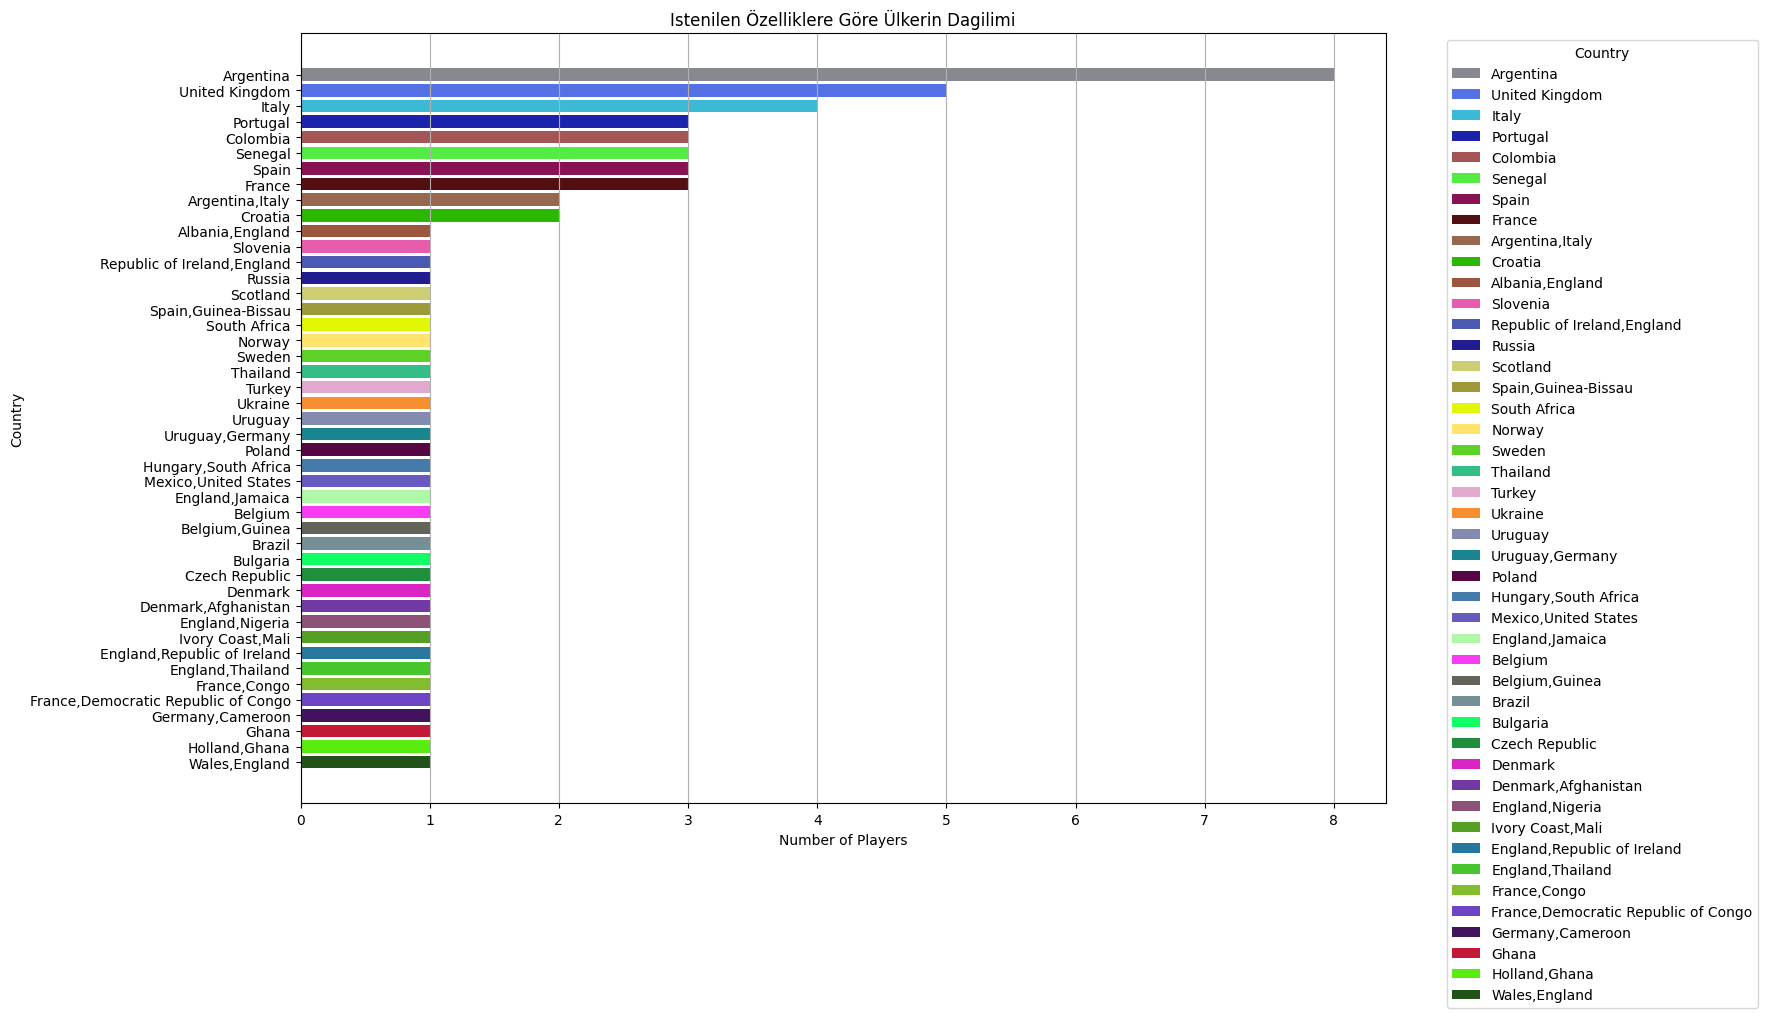

In [30]:
import matplotlib.pyplot as plt


age=21
finishing=13

ulkeler_renkler = {'Türkiye': 'red', 'İspanya': 'blue', 'Fransa': 'green', 'Almanya': 'yellow'}  # Örnek renklendirme, dilediğiniz gibi güncelleyebilirsiniz


#Yaş sütunu 25'ten küçük ve bitiricilik sütunu 18'den fazla olan futbolcuları seç
filtrelenmis_veri = fm[(fm["Age"] < age) & (fm["Finishing"] > finishing)]

#Her bir ülkenin futbolcu sayısını hesapla
ulke_futbolcu_sayisi = filtrelenmis_veri.groupby('Nationality').size().sort_values(ascending=False)



#Renkli kutunun oluşturulması
fig, ax = plt.subplots(figsize=(14, 10))
for i, (ulke, futbolcu_sayisi) in enumerate(ulke_futbolcu_sayisi.items()):
    renk = np.random.rand(3,)  # Rastgele bir RGB renk oluşturur
    ax.barh(i, futbolcu_sayisi, color=renk, label=ulke)

#Eksenleri düzenleme
ax.set_yticks(np.arange(len(ulke_futbolcu_sayisi)))
ax.set_yticklabels(ulke_futbolcu_sayisi.index)
ax.invert_yaxis()  # Ülkeleri büyükten küçüğe doğru sıralamak için yönü tersine çevir

#Görsel ayarlamalar
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.title('Istenilen Özelliklere Göre Ülkerin Dagilimi')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()


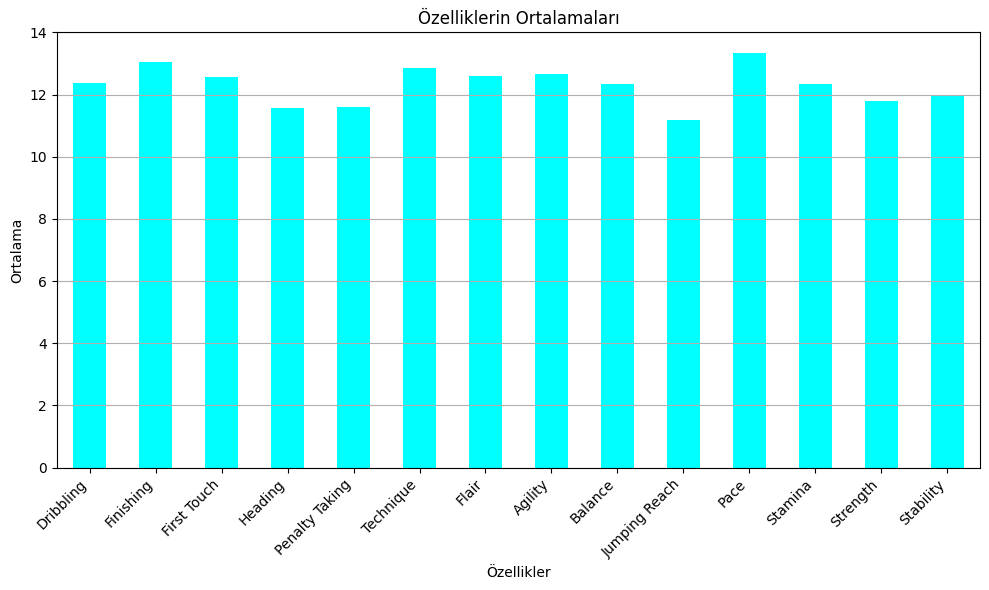

In [31]:
# Belirtilen özelliklerin ortalamasını almak için DataFrame'inizin adını ve özelliklerin adını belirtin
ortalamalar = hucum_fm[['Dribbling', 'Finishing', 'First Touch', 'Heading', 'Penalty Taking', 'Technique', 'Flair', 'Agility', 'Balance', 'Jumping Reach', 'Pace', 'Stamina', 'Strength', 'Stability']].mean()

# Ortalamaları görselleştirme
plt.figure(figsize=(10, 6))
ortalamalar.plot(kind='bar', color='cyan')
plt.title('Özelliklerin Ortalamaları')
plt.xlabel('Özellikler')
plt.ylabel('Ortalama')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

İstediğimiz özellikteki futbolcunun yukarıda mevcut olan grafikte ortalamaların üstünde olmasına dikkat edeceğiz.

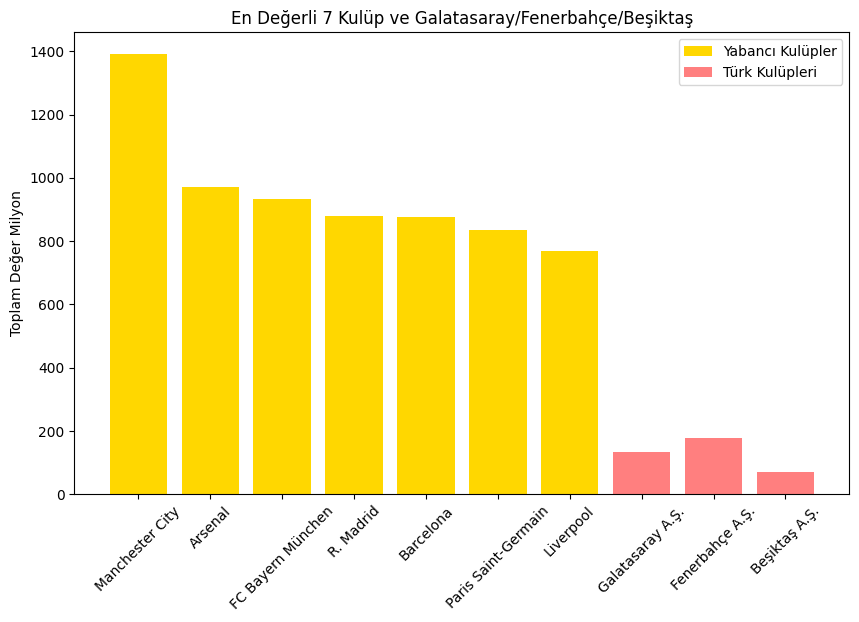

In [32]:
galatasaray_value = fm[fm['Club'] == 'Galatasaray A.Ş.']['Values'].sum()
fenerbahce_value = fm[fm['Club'] == 'Fenerbahçe A.Ş.']['Values'].sum()
besiktas_value = fm[fm['Club'] == 'Beşiktaş A.Ş.']['Values'].sum()

club_values = fm.groupby('Club')['Values'].sum().reset_index()
top_clubs = club_values.nlargest(7, 'Values')


extra_clubs = ['Galatasaray A.Ş.', 'Fenerbahçe A.Ş.', 'Beşiktaş A.Ş.']
extra_values = [galatasaray_value, fenerbahce_value, besiktas_value]

plt.figure(figsize=(10, 6))
plt.bar(top_clubs['Club'], top_clubs['Values'], color='gold', label='Yabancı Kulüpler')
plt.bar(extra_clubs, extra_values, color='red', alpha=0.5, label='Türk Kulüpleri')  # Ekstra sütunlar
plt.title("En Değerli 7 Kulüp ve Galatasaray/Fenerbahçe/Beşiktaş")
plt.ylabel("Toplam Değer Milyon")
plt.xticks(rotation=45)
plt.legend()
plt.show()

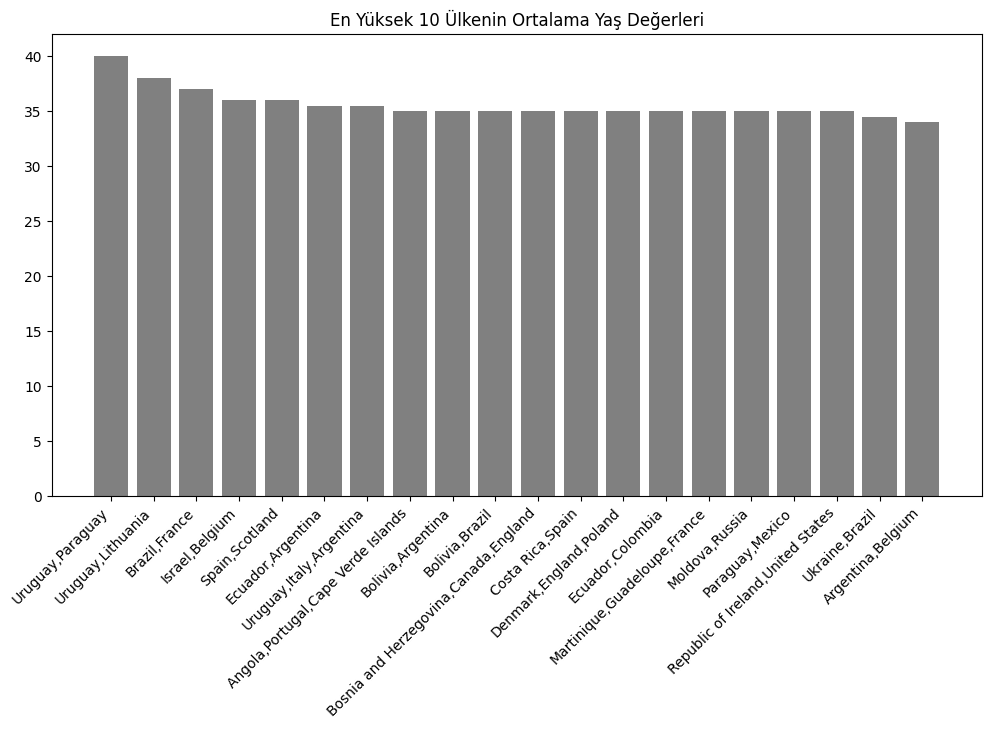

In [33]:
# Nationality sütununa göre yaş ortalamasını hesaplayalım
age_mean_per_country = fm.groupby('Nationality')['Age'].mean().reset_index()

# En yüksek 10 ülkeyi seçelim
top_10_countries = age_mean_per_country.nlargest(20, 'Age')

# Çubuk grafik çizelim
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Nationality'], top_10_countries['Age'], color='gray')
plt.title("En Yüksek 10 Ülkenin Ortalama Yaş Değerleri")
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
fm['Nationality'].replace({'United States': 'United States of America'}, inplace=True)
fm['Nationality'].replace({'England': 'United Kingdom'}, inplace=True)
fm['Nationality'].replace({'Republic of Ireland': 'Ireland'}, inplace=True)
fm['Nationality'].replace({'China PR': 'China'}, inplace=True)

In [35]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.4 MB/s eta 0:00:00


<ipython-input-36-b0c535385a56>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


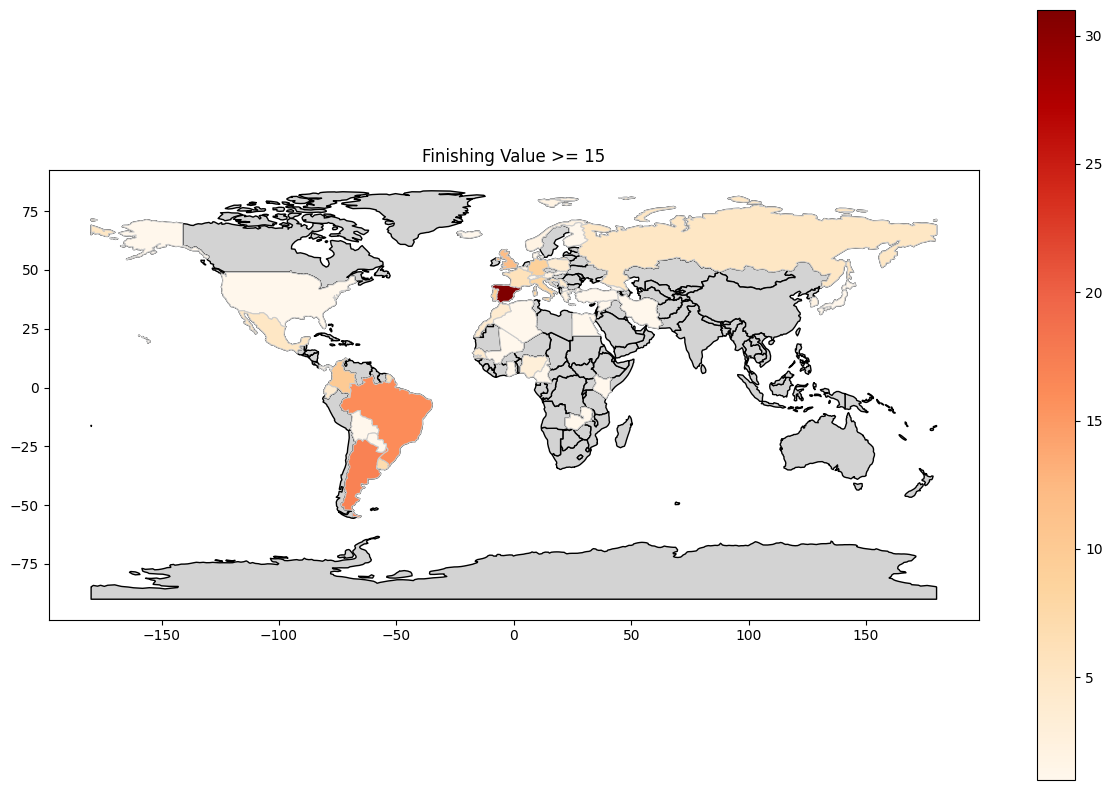

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt

value = 15

# Ulke sınırları veri kümesini yükleyelim
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Eşik değerinin üzerindeki oyuncuları filtreleyelim
filtered_fm = fm[fm['Finishing'] >= value]

# Oyuncu sayısını her bir ülke için hesaplayalım
players_per_country = filtered_fm['Nationality'].value_counts().reset_index()
players_per_country.columns = ['Nationality', 'PlayerCount']

# Haritayı çizelim
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Ülkeleri oyuncu sayısına göre ısı haritası olarak renklendirelim
world.merge(players_per_country, how='left', left_on='name', right_on='Nationality').plot(column='PlayerCount', cmap='OrRd',linewidth=0.8, ax=ax, edgecolor='0.8',legend=True)
plt.title(f'Finishing Value >= {value}')
plt.show()


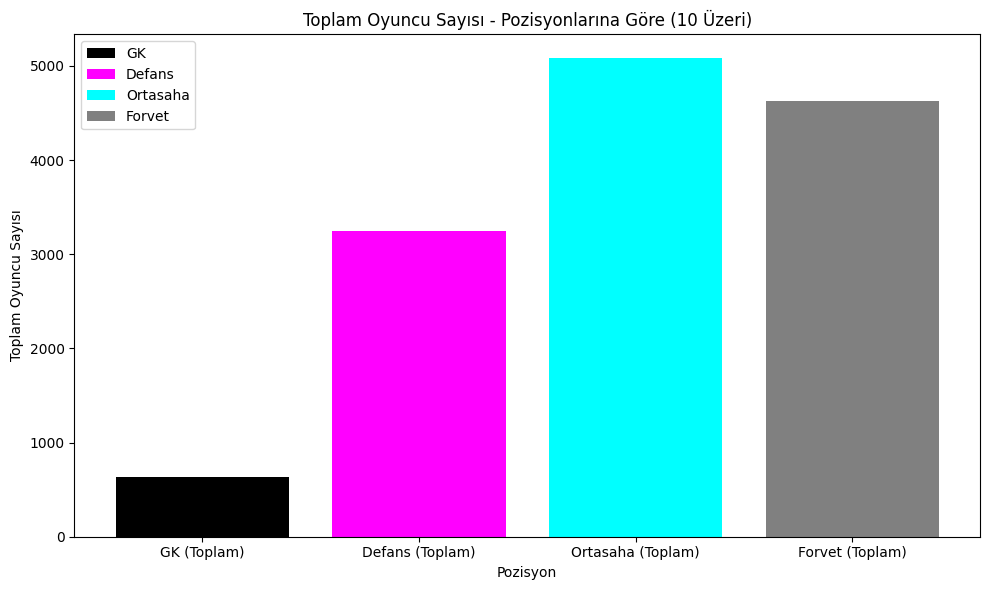

In [37]:
aim_value=10
# 'GK' pozisyonunda 10'dan fazla oyuncusu olanları seçme
gk = fm[fm['GK'] > aim_value]
total_gk = gk.shape[0]

# 'Defans' pozisyonunda 10'dan fazla oyuncusu olanları seçme
defence = fm[(fm['DL'] + fm['DC'] + fm['DR'] + fm['WBL'] + fm['WBR']) > aim_value]
total_defans = defence.shape[0]

# 'Ortasaha' pozisyonunda 10'dan fazla oyuncusu olanları seçme
midfield = fm[(fm['DM'] + fm['ML'] + fm['MC'] + fm['MR']) > aim_value]
total_midfield = midfield.shape[0]

# 'Forvet' pozisyonunda 10'dan fazla oyuncusu olanları seçme
forvet = fm[(fm['AML'] + fm['AMC'] + fm['AMR'] + fm['ST']) > aim_value]
total_forvet = forvet.shape[0]

# Grafik çizimi
plt.figure(figsize=(10, 6))

# Her pozisyon için çubuk grafikleri oluşturma
plt.bar('GK (Toplam)', total_gk, color='black', label='GK')
plt.bar('Defans (Toplam)', total_defans, color='magenta', label='Defans')
plt.bar('Ortasaha (Toplam)', total_midfield, color='cyan', label='Ortasaha')
plt.bar('Forvet (Toplam)', total_forvet, color='gray', label='Forvet')

plt.title(f'Toplam Oyuncu Sayısı - Pozisyonlarına Göre ({aim_value} Üzeri)')
plt.xlabel('Pozisyon')
plt.ylabel('Toplam Oyuncu Sayısı')
plt.legend()
plt.tight_layout()
plt.show()

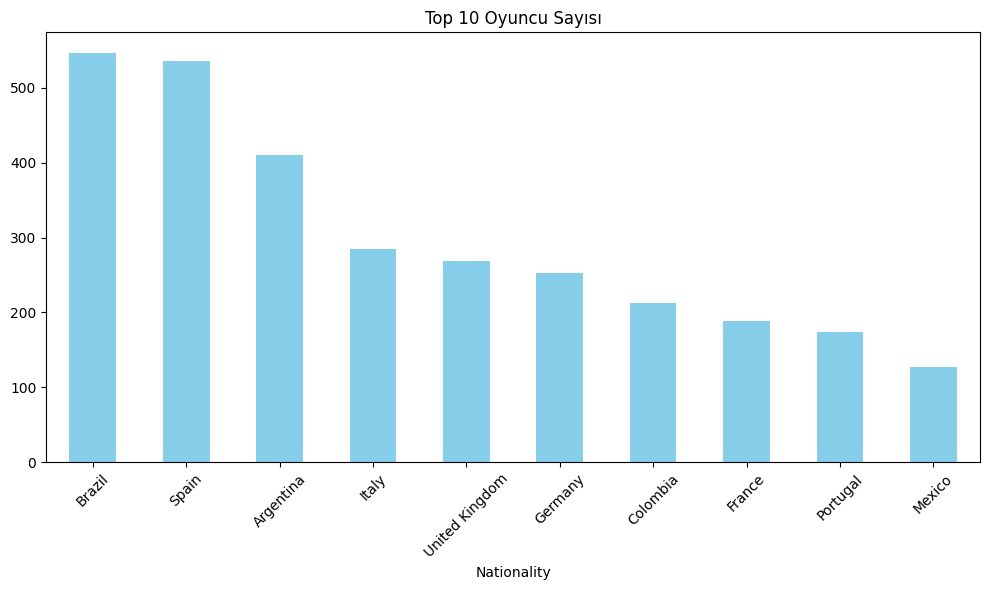

In [38]:
# Milliyetlere göre kişi sayılarını hesaplamak
nationality_counts = fm['Nationality'].value_counts()

# Grafiği çizmek
plt.figure(figsize=(10, 6))
nationality_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Oyuncu Sayısı')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3)ALGORİTMALARIMIZA BAŞLIYORUZ**

In [39]:
1from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

# Modellerin ve isimlerin tanımlanması
models = {
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "XGBoost Regression": XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, min_child_weight=1,
                                        gamma=0, subsample=1, colsample_bytree=1),  # XGBoost için hiperparametreler
    "ElasticNet Regression": ElasticNet(),
    "SVR": SVR()
}

# X VE Y
X = hucum_fm.drop(['Name','Position', 'Values', 'Normalized_Values'], axis=1)
y = hucum_fm['Normalized_Values']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Her bir model için eğitim ve tahmin işlemleri
for name, model in models.items():
    # Modelin eğitimi
    model.fit(X_train, y_train)

    # Tahminlerin yapılması
    y_pred = model.predict(X_test)

    # Hata hesaplaması
    mse = mean_squared_error(y_test, y_pred)

    print(f"Model: {name}")
    print("========================")
    print("Mean Squared Error (MSE):", mse)
    print("\n")


SyntaxError: invalid decimal literal (<ipython-input-39-7ca1cde1d3f4>, line 1)

In [ ]:
#Girdiğimiz inputlara göre oyuncunun Normalize Values'ini tahmin etme kodumuz:

from xgboost import plot_importance

'''
age=float(input("Age:"))
dribbling = float(input("Dribbling: "))
finishing = float(input("Finishing: "))
first_touch = float(input("First Touch: "))
heading = float(input("Heading: "))
penalty_taking = float(input("Penalty Taking: "))
technique = float(input("Technique: "))
flair = float(input("Flair: "))
agility = float(input("Agility: "))
balance = float(input("Balance: "))
jumping_reach = float(input("Jumping Reach: "))
pace = float(input("Pace: "))
stamina = float(input("Stamina: "))
strength = float(input("Strength: "))
stability = float(input("Stability: "))

input_features = [[age,dribbling, finishing, first_touch, heading, penalty_taking, technique, flair, agility, balance,
                   jumping_reach, pace, stamina, strength, stability]]

model =XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, min_child_weight=1,
                                        gamma=0, subsample=0.75, colsample_bytree=1)
model.fit(X, y)

predicted_value = model.predict(input_features)

original_value = predicted_value[0]*fm["Values"].max()

print("Tahmin edilen Values değeri:", predicted_value[0])
print("Orijinal Değer: ", original_value)

plot_importance(model, max_num_features=10)
plt.show()
'''


      Values  Predicted_Values
1     180.00        180.581717
2      20.00         24.785406
3     180.00        183.466573
4      65.00         62.727605
5      15.00         18.348029
...      ...               ...
7616    0.25         -0.818570
7618    1.00         -1.185716
7624    1.00          1.186071
7640    0.10          3.610496
7641    0.20          1.688109

[1450 rows x 2 columns]


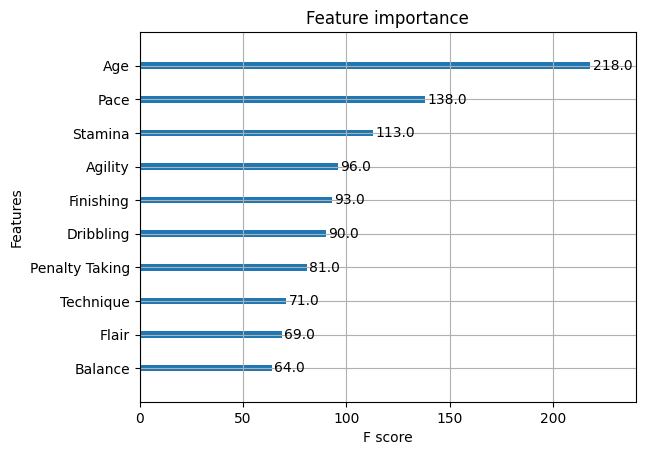

In [40]:
import pandas as pd
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

# hucum_fm verisetini yükleyin


X = hucum_fm.drop(['Name','Position', 'Values', 'Normalized_Values'], axis=1)
y = hucum_fm['Normalized_Values']

model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, min_child_weight=1,
                     gamma=0, subsample=0.75, colsample_bytree=1)
model.fit(X, y)

for index, row in hucum_fm.iterrows():
    age = row['Age']
    dribbling = row['Dribbling']
    finishing = row['Finishing']
    first_touch = row['First Touch']
    heading = row['Heading']
    penalty_taking = row['Penalty Taking']
    technique = row['Technique']
    flair = row['Flair']
    agility = row['Agility']
    balance = row['Balance']
    jumping_reach = row['Jumping Reach']
    pace = row['Pace']
    stamina = row['Stamina']
    strength = row['Strength']
    stability = row['Stability']

    input_features = [[age, dribbling, finishing, first_touch, heading, penalty_taking, technique, flair, agility,
                       balance, jumping_reach, pace, stamina, strength, stability]]

    predicted_value = model.predict(input_features)

    original_value = predicted_value[0] * hucum_fm["Values"].max()

    hucum_fm.at[index, 'Predicted_Values'] = original_value

print(hucum_fm[['Values', 'Predicted_Values']])

plot_importance(model, max_num_features=10)
plt.show()


In [41]:
hucum_fm.head(20)

,Name,Age,Dribbling,Finishing,First Touch,Heading,Penalty Taking,Technique,Flair,Agility,Balance,Jumping Reach,Pace,Stamina,Strength,Stability,Values,Normalized_Values,Position,Predicted_Values
1,Kylian Mbappe,23,18,17,18,7,18,17,18,16,15,8,20,14,11,15,180.0,1.000000,AM/S RL,180.581717
2,Robert Lewandowski,33,13,19,18,17,20,16,14,13,19,15,14,18,16,18,20.0,0.111062,S,24.785406
3,Erling Haaland,22,14,18,16,15,17,15,16,16,17,18,19,14,17,17,180.0,1.000000,S,183.466573
4,Mohamed Salah,30,17,17,17,10,17,17,15,16,18,8,18,15,15,15,65.0,0.361076,AM/S RL,62.727605
5,Karim Benzema,34,16,17,20,15,15,20,17,14,15,11,15,14,14,14,15.0,0.083282,S,18.348029
6,Harry Kane,28,14,19,15,15,20,16,12,12,14,13,14,16,15,17,110.0,0.611090,S C,97.118175
9,Lionel Messi,35,20,17,19,10,17,20,20,15,18,6,15,12,9,16,35.0,0.194400,AM/S RC,31.906405
21,Heung-Min Son,30,16,18,13,8,9,17,13,14,12,10,16,16,10,16,50.0,0.277738,AM/S L,47.763426
22,Sadio Mane,30,16,15,16,14,13,17,16,16,16,12,15,14,11,12,20.0,0.111062,AM/S RLC,21.245603
32,Kai Havertz,23,14,16,18,13,12,17,15,13,13,14,17,15,13,13,60.0,0.333296,AM/S C,60.524277


In [42]:
hucum_fm['Diff_Values'] = hucum_fm['Predicted_Values'] - hucum_fm['Values']

hucum_fm.head(20)

,Name,Age,Dribbling,Finishing,First Touch,Heading,Penalty Taking,Technique,Flair,Agility,...,Jumping Reach,Pace,Stamina,Strength,Stability,Values,Normalized_Values,Position,Predicted_Values,Diff_Values
1,Kylian Mbappe,23,18,17,18,7,18,17,18,16,...,8,20,14,11,15,180.0,1.000000,AM/S RL,180.581717,0.581717
2,Robert Lewandowski,33,13,19,18,17,20,16,14,13,...,15,14,18,16,18,20.0,0.111062,S,24.785406,4.785406
3,Erling Haaland,22,14,18,16,15,17,15,16,16,...,18,19,14,17,17,180.0,1.000000,S,183.466573,3.466573
4,Mohamed Salah,30,17,17,17,10,17,17,15,16,...,8,18,15,15,15,65.0,0.361076,AM/S RL,62.727605,-2.272395
5,Karim Benzema,34,16,17,20,15,15,20,17,14,...,11,15,14,14,14,15.0,0.083282,S,18.348029,3.348029
6,Harry Kane,28,14,19,15,15,20,16,12,12,...,13,14,16,15,17,110.0,0.611090,S C,97.118175,-12.881825
9,Lionel Messi,35,20,17,19,10,17,20,20,15,...,6,15,12,9,16,35.0,0.194400,AM/S RC,31.906405,-3.093595
21,Heung-Min Son,30,16,18,13,8,9,17,13,14,...,10,16,16,10,16,50.0,0.277738,AM/S L,47.763426,-2.236574
22,Sadio Mane,30,16,15,16,14,13,17,16,16,...,12,15,14,11,12,20.0,0.111062,AM/S RLC,21.245603,1.245603
32,Kai Havertz,23,14,16,18,13,12,17,15,13,...,14,17,15,13,13,60.0,0.333296,AM/S C,60.524277,0.524277


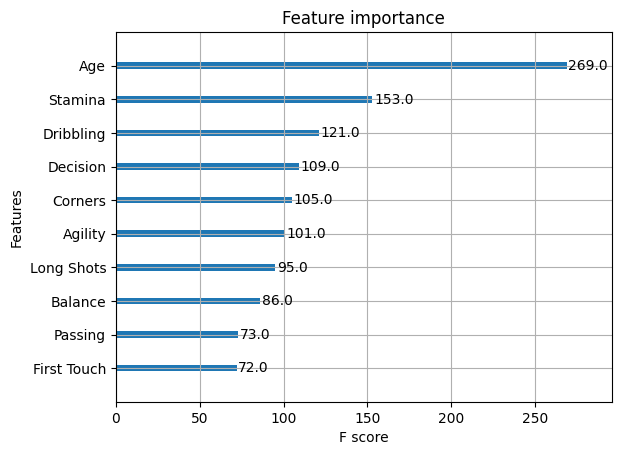

,Name,Age,Dribbling,Corners,Crossing,First Touch,Long Shots,Passing,Technique,Vision,Decision,Agility,Balance,Stamina,Values,Normalized_Values,Position,Predicted_Values,Diff_Values
0,Kevin De Bruyne,31,15,14,19,16,17,18,18,20,18,13,14,17,60.0,0.333296,M/AM RLC,59.516405,-0.483595
1,Kylian Mbappe,23,18,13,13,18,13,15,17,15,15,16,15,14,180.0,1.000000,AM/S RL,160.467725,-19.532275
4,Mohamed Salah,30,17,12,14,17,13,15,17,17,15,16,18,15,65.0,0.361076,AM/S RL,42.185373,-22.814627
9,Lionel Messi,35,20,15,15,19,16,19,20,20,18,15,18,12,35.0,0.194400,AM/S RC,36.090249,1.090249
10,Luka Modric,36,17,16,16,20,14,19,19,19,18,14,13,13,10.0,0.055503,M C,9.518474,-0.481526
11,Joshua Kimmich,27,12,15,17,16,14,18,16,18,16,12,13,20,75.0,0.416634,D/DM/M RC,68.998904,-6.001096
12,Neymar,30,20,16,16,18,15,17,20,17,14,16,14,13,45.0,0.249958,M/AM LC,34.642250,-10.357750
14,Bernardo Silva,27,17,14,15,17,13,17,18,17,15,19,16,17,80.0,0.444414,M/AM RC,82.507576,2.507576
17,Rodri,26,13,7,8,15,14,15,14,14,18,13,12,17,110.0,0.611090,DM C,95.247710,-14.752290
18,Vinicius Junior,22,18,7,13,13,12,14,15,14,15,16,14,14,150.0,0.833324,AM RL,142.045079,-7.954921


In [43]:
import pandas as pd
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
from xgboost import plot_importance


X = ortasaha_fm.drop(['Name','Position', 'Values', 'Normalized_Values'], axis=1)
y = ortasaha_fm['Normalized_Values']

model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, min_child_weight=1,
                     gamma=0, subsample=0.75, colsample_bytree=1)
model.fit(X, y)

for index, row in ortasaha_fm.iterrows():
    age = row['Age']
    dribbling = row['Dribbling']
    corners = row['Corners']
    crossing = row['Crossing']
    first_touch = row['First Touch']
    long_shots = row['Long Shots']
    passing = row['Passing']
    technique = row['Technique']
    vision = row['Vision']
    decision = row['Decision']
    agility = row['Agility']
    balance = row['Balance']
    stamina = row['Stamina']

    input_features = [[age, dribbling, corners, crossing, first_touch, long_shots, passing, technique, vision,
                       decision, agility, balance, stamina]]

    predicted_value = model.predict(input_features)
    original_value = predicted_value[0] * fm["Values"].max()
    ortasaha_fm.at[index, 'Predicted_Values'] = original_value



plot_importance(model, max_num_features=10)
plt.show()

ortasaha_fm['Diff_Values'] = ortasaha_fm['Predicted_Values'] - ortasaha_fm['Values']
ortasaha_fm.head(20)

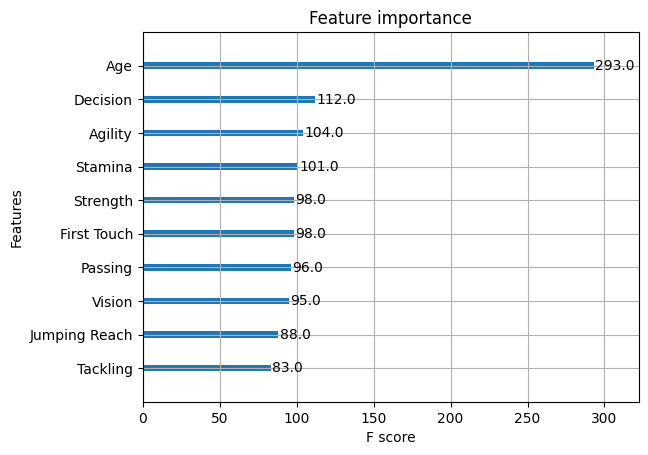

,Name,Age,First Touch,Heading,Marking,Tackling,Jumping Reach,Strength,Passing,Vision,Decision,Agility,Balance,Stamina,Values,Normalized_Values,Position,Predicted_Values,Diff_Values
8,Virgil van Dijk,31,17,18,17,17,17,17,16,14,17,12,15,14,32.0,0.177732,D C,31.907829,-0.092171
11,Joshua Kimmich,27,16,11,13,12,10,11,18,18,16,12,13,20,75.0,0.416634,D/DM/M RC,74.123645,-0.876355
17,Rodri,26,15,13,12,17,17,16,15,14,18,13,12,17,110.0,0.611090,DM C,102.616704,-7.383296
20,Ruben Dias,25,13,15,17,18,16,16,14,13,15,13,12,18,80.0,0.444414,D C,83.606016,3.606016
26,Thiago,31,18,10,12,15,10,9,18,18,15,17,15,14,10.0,0.055503,DM/M/AM C,15.135377,5.135377
27,Aymeric Laporte,28,15,16,16,15,16,14,16,16,16,13,12,15,25.0,0.138841,D C,32.835072,7.835072
28,Thiago Silva,37,14,17,17,16,13,14,13,13,17,12,16,14,2.0,0.011056,D C,12.008046,10.008046
30,N'Golo Kante,31,14,10,12,19,7,11,15,14,16,13,15,18,10.0,0.055503,DM/M C,14.736228,4.736228
31,Joao Cancelo,28,15,10,9,13,11,12,16,16,15,16,14,14,40.0,0.222179,D/WB RL,27.731061,-12.268939
34,Antonio Rudiger,29,10,15,15,17,15,18,12,10,17,9,17,16,25.0,0.138841,D C,25.363719,0.363719


In [44]:
X = defans_fm.drop(['Name','Position', 'Values', 'Normalized_Values'], axis=1)
y = defans_fm['Normalized_Values']

model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, min_child_weight=1,
                     gamma=0, subsample=0.75, colsample_bytree=1)
model.fit(X, y)

for index, row in defans_fm.iterrows():
    age = row['Age']
    first_touch = row['First Touch']
    heading = row['Heading']
    marking = row['Marking']
    tackling = row['Tackling']
    jumping_reach = row['Jumping Reach']
    strength = row['Strength']
    passing = row['Passing']
    vision = row['Vision']
    decision = row['Decision']
    agility = row['Agility']
    balance = row['Balance']
    stamina = row['Stamina']

    input_features = [[age, first_touch, heading, marking, tackling, jumping_reach, strength, passing, vision,
                       decision, agility, balance, stamina]]

    predicted_value = model.predict(input_features)
    original_value = predicted_value[0] * fm["Values"].max()
    defans_fm.at[index, 'Predicted_Values'] = original_value



plot_importance(model, max_num_features=10)
plt.show()

defans_fm['Diff_Values'] = defans_fm['Predicted_Values'] - defans_fm['Values']
defans_fm.head(20)

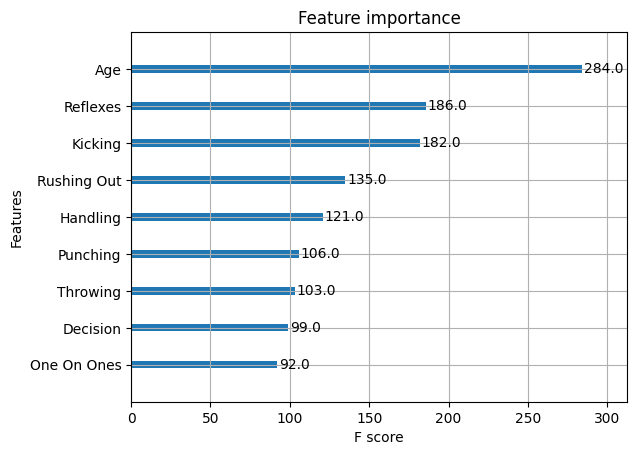

,Name,Age,Decision,Kicking,Handling,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Values,Normalized_Values,Position,Predicted_Values,Diff_Values
7,Thibaut Courtois,30,16,16,16,18,19,12,6,15,35.0,0.194400,GK,35.114609,0.114609
13,Alisson,29,16,15,16,18,17,16,14,14,32.0,0.177732,GK,31.103593,-0.896407
15,Manuel Neuer,36,15,18,14,16,16,20,8,18,5.0,0.027724,GK,6.215854,1.215854
16,Ederson,28,15,20,16,13,14,17,6,17,40.0,0.222179,GK,38.395092,-1.604908
19,Marc-Andre ter Stegen,30,13,19,14,14,18,18,10,17,35.0,0.194400,GK,34.001269,-0.998731
23,Jan Oblak,29,16,16,18,16,19,15,9,14,35.0,0.194400,GK,36.998759,1.998759
41,Edouard Mendy,30,16,13,16,14,16,12,8,12,10.0,0.055503,GK,11.436519,1.436519
62,Gianluigi Donnarumma,23,15,13,15,16,18,11,14,12,40.0,0.222179,GK,36.755335,-3.244665
64,Mike Maignan,27,14,16,15,14,17,7,9,14,40.0,0.222179,GK,31.484410,-8.515590
101,Keylor Navas,35,15,14,12,16,17,12,16,15,2.0,0.011056,GK,2.125299,0.125299


In [45]:
X = kaleci_fm.drop(['Name','Position', 'Values', 'Normalized_Values'], axis=1)
y = kaleci_fm['Normalized_Values']

model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, min_child_weight=1,
                     gamma=0, subsample=0.75, colsample_bytree=1)
model.fit(X, y)

for index, row in kaleci_fm.iterrows():
    age = row['Age']
    decision = row['Decision']
    kicking = row['Kicking']
    handling = row['Handling']
    one_on_ones = row['One On Ones']
    reflexes = row['Reflexes']
    rushing_out = row['Rushing Out']
    punching = row['Punching']
    throwing = row['Throwing']

    input_features = [[age, decision, kicking, handling, one_on_ones, reflexes, rushing_out, punching, throwing]]

    predicted_value = model.predict(input_features)
    original_value = predicted_value[0] * fm["Values"].max()
    kaleci_fm.at[index, 'Predicted_Values'] = original_value



plot_importance(model, max_num_features=10)
plt.show()

kaleci_fm['Diff_Values'] = kaleci_fm['Predicted_Values'] - kaleci_fm['Values']
kaleci_fm.head(20)

In [46]:
sorted_df = kaleci_fm.sort_values(by='Diff_Values', ascending=False).head(20)
print(sorted_df)

                    Name  Age  Decision  Kicking  Handling  One On Ones  \
4370         Mile Svilar   22        12       14        14           13   
5310         Niklas Hedl   21         9       15        14           12   
3494       Dani Figueira   24        12       13        15           13   
6264     Matheus Donelli   20        13       10        13           16   
1741  David Von Ballmoos   27        13       12        15           14   
2635        Alfred Gomis   28        13       14        14           13   
2330       Santiago Mele   24        12        8        14           15   
4127      Andre Ferreira   26        11       13        14           12   
1561      Marvin Schwabe   27        13       15        12           16   
5710        Marcel Lotka   21        10       15        15           12   
816     Thomas Strakosha   27        12       13        15           14   
491     Fernando Pacheco   30        12       14        15           14   
1049          Tom Heaton 

In [48]:
sorted_df = defans_fm.sort_values(by='Diff_Values', ascending=False).head(20)
print(sorted_df)

                   Name  Age  First Touch  Heading  Marking  Tackling  \
461         Eric Garcia   21           14       13       15        15   
405       Unai Vencedor   21           14        9       14        15   
1528    Ibrahima Diallo   23           14       10       13        14   
907   Boubakary Soumare   23           14       10       13        14   
1305     Tanguy Nianzou   20           12       16       13        13   
5162     Darko Nejasmic   23           14       13       11        12   
4658    Krystian Bielik   24           14       14       15        14   
4686      Ardon Jashari   19           13        5        9        10   
4766      Raul Torrente   21           15       14       11        17   
586        Oliver Skipp   21           13       12       13        16   
537         Oriol Romeu   30           14       12       14        17   
1736    Giulio Maggiore   24           14       14       11        14   
716   Diadie Samassekou   26           13       10 

In [49]:
sorted_df = ortasaha_fm.sort_values(by='Diff_Values', ascending=False).head(20)
print(sorted_df)

                  Name  Age  Dribbling  Corners  Crossing  First Touch  \
87               Pedri   19         17        9        14           18   
261            Vitinha   22         15       12        11           15   
138       Jadon Sancho   22         18       13        13           16   
988       Bruno Tabata   25         16       15        14           16   
3255  August Mikkelsen   21         14        7        11           15   
2115   Aaron Boupendza   25         15        2         9           14   
5783        Emil Ceide   20         16        7        11           14   
3962      Ondrej Lingr   23         16        7        13           12   
1348      Andre Franco   24         16       14        14           15   
2098    Esequiel Barco   23         15       12        12           15   
1528   Ibrahima Diallo   23         13        7        11           14   
2178       Alan Franco   23         10        7         9           14   
1350      Ilaix Moriba   19         14

In [50]:
sorted_df = hucum_fm.sort_values(by='Diff_Values', ascending=False).head(20)
print(sorted_df)

                    Name  Age  Dribbling  Finishing  First Touch  Heading  \
938            Fernando1   23         15         14           14       10   
4456     Myziane Maolida   23         15         11           14        8   
5129        Daouda Bamba   27         13         12           12       13   
3624       Wilson Isidor   21         12         14           13       12   
515    Kelechi Iheanacho   25         13         17           15       13   
3381    Jose Juan Macias   22         12         15           14       10   
809         Lukas Nmecha   23         13         15           13       13   
5967  Vladyslav Supriaha   22         12         10           12       10   
6588        Franco Frias   20         16         14           12       10   
2115     Aaron Boupendza   25         15         14           14       12   
5520        Ibrahim Adel   21         14         13           14        7   
569      Gabriel Barbosa   25         15         15           15       12   